In [70]:
import json
import pandas as pd
from matplotlib import pylab as plt
import numpy as np

In [2]:
with open('data/news.json', "r", encoding="utf_8_sig") as news_json:
    data = json.loads(news_json.read())

In [3]:
df = pd.read_excel('data/dataset_news_1.xlsx')


In [4]:
def get_news_id_from_url(url: str) -> int:
    """
    Вычленить id из url
    """
    parts = url.split('/')
    try:
        if parts[-2] == '9468':
            print(url)
        return int(parts[-2])
    except Exception as err:
        print(url)
        for part in parts:
            if '073' in part:  # Опытным путем выявлено, что битые урлы
                # только для типа 073, поэтому просто решила вытащить такие
                return int(part)
        print("it is not news url ", url)
        return 0


def get_news_type(news_id: int) -> str:
    """
    Ради понимания структуры данных, получить тип новости из id,
    также найти ошибочные id (нашла таких 3 штуки)
    """
    if str(news_id)[-3:] == '073':
        return "news"
    if str(news_id)[-3:] == '050':
        return "major"
    else:
        print(news_id)
        return "error"

In [5]:
df['news_id'] = df['url_clean'].apply(get_news_id_from_url)
df['news_type'] = df['news_id'].apply(get_news_type)

mos.ru/news/item/89421073/ /
mos.ru/news/item/9468/
mos.ru/news/item/94670073/ /
mos.ru/news/item/94501073/душ/
mos.ru/news/item/89957073/ Их/
mos.ru/news/item/94852073/%5c/
mos.ru/news/item/94479073/ (https:/app.aif.ru/owa/redir.aspx/
mos.ru/news/item/94792073/ /
mos.ru/news/item/94897073/+/
mos.ru/news/item/94953073/ /
mos.ru/news/item/91919073/-/
9514707
9468


In [6]:
df_json = pd.read_json('data/news.json', encoding="utf_8_sig")  # Закинем json в df
df_json["news_type"] = df_json['id'].apply(get_news_type)

In [7]:
df_merge = df.merge(df_json, left_on='news_id', right_on='id')

In [8]:
df_merge.head()

,date_time,url_clean,user_id,news_id,news_type_x,id,title,importance,published_at,created_at,...,territory_area_id,territory_district_id,preview_text,full_text,url,preview,text,promo,images,news_type_y
0,2021-08-01 18:51:19,mos.ru/news/item/94006073/,1,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
1,2021-08-04 13:08:19,mos.ru/news/item/94006073/,2,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
2,2021-08-29 12:40:07,mos.ru/news/item/94006073/,3,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
3,2021-08-02 09:04:55,mos.ru/news/item/94006073/,6,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
4,2021-08-02 17:16:23,mos.ru/news/item/94006073/,11,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news


In [176]:
df_merge['view_to_pub'] = df_merge.date_time - df_merge.published_at
df_merge['view_to_pub_days'] = df_merge['view_to_pub'].apply(lambda x: x.days)
df_merge[df_merge['view_to_pub_days'] < 0]

,date_time,url_clean,user_id,news_id,news_type_x,id,title,importance,published_at,created_at,...,url,preview,text,promo,images,news_type_y,timedelta_passed,days_passed,view_to_pub,view_to_pub_days
9256,2021-08-24 17:01:56,mos.ru/news/item/95079073/,255,95079073,news,95079073,Москвичи стали чаще записываться к врачам поли...,,2021-08-27 07:02:00,2021-08-24 16:49:32,...,/news/item/95079073/,NaN,NaN,NaN,NaN,news,55 days 05:58:01.506144,55,-3 days +09:59:56,-3
11633,2021-08-24 17:02:22,mos.ru/news/item/95075073/,255,95075073,news,95075073,На mos.ru заработал сервис проверки статуса за...,,2021-08-25 10:16:03,2021-08-24 16:21:42,...,/news/item/95075073/,NaN,NaN,NaN,NaN,news,57 days 02:43:58.531107,57,-1 days +06:46:19,-1


<AxesSubplot:>

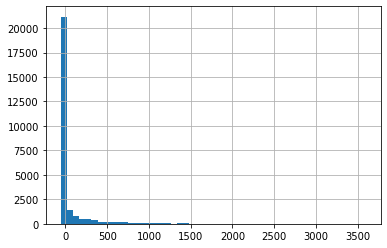

In [161]:
df_merge['view_to_pub_days'].hist(bins=50)

In [305]:
df_json['views'] = df_json['id'].apply(lambda x: df.news_id[df.news_id == x].count())
df_json['unique_views'] = df_json['id'].apply(lambda x: df[df.news_id == x].user_id.nunique())
df_json['timedelta_passed'] = df_json.published_at.apply(lambda x: pd.Timestamp.now() - x)
df_json['days_passed'] = df_json.timedelta_passed.apply(lambda x: x.days - 50)

In [178]:
df_json.views.describe()

count    6554.000000
mean        4.034483
std         8.167540
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        71.000000
Name: views, dtype: float64

<AxesSubplot:>

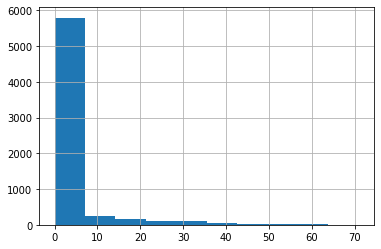

In [179]:
df_json.views.hist()

<AxesSubplot:>

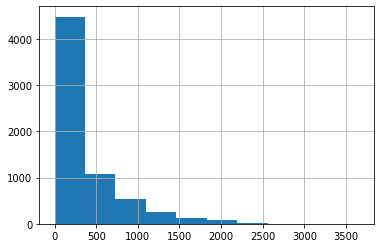

In [180]:
df_json['days_passed'].hist()

In [181]:
df_json['days_passed'].describe()

count    6554.000000
mean      341.380226
std       424.828316
min         0.000000
25%        48.000000
50%       169.000000
75%       458.000000
max      3655.000000
Name: days_passed, dtype: float64

In [306]:
mean_views = df_json.unique_views.mean()
print(mean_views)
def get_rank(views, days):
    views = views
    if days == 0:
        if views < mean_views:
            views = mean_views
    return views / (days + 1)**(1/2)
        

df_json['rank'] = df_json.apply(lambda x: get_rank(x.unique_views, x.days_passed), axis='columns')

4.020903265181569


In [307]:
df_json['rank'].describe()

count    6554.000000
mean        0.791823
std         1.985221
min         0.000000
25%         0.041213
50%         0.088045
75%         0.353553
max        16.302936
Name: rank, dtype: float64

In [308]:
df_json[['title', 'rank', 'views', 'days_passed', 'id']].sort_values('rank', ascending=False).head(20)

,title,rank,views,days_passed,id
2492,Более 120 культурных площадок Москвы приглашаю...,16.302936,61,13,94849073
6490,Правительство Москвы рассмотрит проекты компле...,16.000000,69,15,7575050
1956,Москва поднялась на четыре позиции в рейтинге ...,15.500000,62,15,94702073
2673,Кинопоказы на подводной лодке и уроки итальянс...,14.552138,60,16,94634073
6059,Сергей Собянин рассказал о развитии электротра...,14.500000,58,15,7574050
3435,В Москве начала работать онлайн-платформа «Кар...,13.761951,66,22,94417073
3912,«Миллион призов»: москвичи смогут направить вы...,13.750000,55,15,94705073
6268,Сергей Собянин: Павильоны «Здоровая Москва» во...,13.676318,67,23,7552050
2410,Кампания по сокращению потребления воды в Моск...,13.590155,49,12,94860073
4395,Московские лифты начали оснащать бактерицидным...,13.339459,55,16,94647073


In [270]:
df_json[df_json['days_passed'] < 3].sort_values('views', ascending=False).head()

,id,title,importance,published_at,created_at,updated_at,is_deferred_publication,status,ya_rss,active_from,...,url,preview,text,promo,images,news_type,views,timedelta_passed,days_passed,rank
2069,95239073,Чат-боты и машинное зрение: идет прием заявок ...,,2021-08-30 07:07:00,2021-08-27 14:15:55,2021-08-30 07:06:19,0.0,public,1,NaN,...,/news/item/95239073/,NaN,NaN,NaN,NaN,news,12,52 days 07:07:52.633144,2,6.928203
2241,95281073,Три золотые медали завоевали москвичи на Европ...,,2021-08-30 07:04:01,2021-08-29 16:03:24,2021-08-30 07:03:43,0.0,public,1,NaN,...,/news/item/95281073/,NaN,NaN,NaN,NaN,news,8,52 days 07:10:51.634802,2,4.618802
4352,95280073,Вакцинированные доноры могут сдать плазму с ан...,,2021-08-30 07:02:03,2021-08-29 15:41:11,2021-08-30 07:01:32,0.0,public,1,NaN,...,/news/item/95280073/,NaN,NaN,NaN,NaN,news,7,52 days 07:12:49.655563,2,4.041452
396,95282073,Акция по чипированию домашних животных начнетс...,,2021-08-30 07:05:02,2021-08-29 16:07:59,2021-08-30 07:04:01,0.0,public,1,NaN,...,/news/item/95282073/,NaN,NaN,NaN,NaN,news,7,52 days 07:09:50.616620,2,4.041452
6121,7612050,Сергей Собянин снизил стоимость проезда в обще...,NaN,2021-08-30 09:13:00,2021-08-29 10:39:18,2021-08-30 09:12:19,NaN,public,1,NaN,...,/mayor/themes/2299/7612050/,Это позволит экономить на регулярных поездках ...,<p>В столице с 1 сентября отменят оплату проез...,0.0,"[{'id': 3304725281, 'title': '', 'copyright': ...",major,7,52 days 05:01:52.672801,2,4.041452


In [302]:
df_json['unique_views'].describe()

count    6554.000000
mean        4.020903
std         8.105836
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        69.000000
Name: unique_views, dtype: float64

<AxesSubplot:>

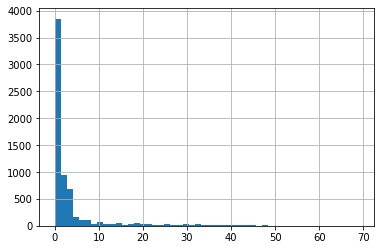

In [304]:
df_json['unique_views'].hist(bins=50)